# Assignment 2

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

## Part 1 - Regression

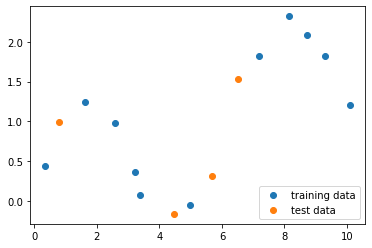

In [98]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    %matplotlib inline
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment to the autograder**.   
part1_scatter()

### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="readonly/polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [45]:
# Importing instances
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Initialize return variable
predictions = np.zeros([4,100])

# List of polynomial degrees explored
degrees = [1, 3, 6, 9]

# test variable
predict_values = np.linspace(0,10, 100).reshape(100,1)

In [52]:
# testing 1 prInput operand 1 has a mismatch in its core dimension 0, with gufunc signatureediction

poly = PolynomialFeatures(degree=degrees[0])
X_poly = poly.fit_transform(X_train.reshape(-1,1))
X_test_poly = poly.transform(predict_values)
model = LinearRegression()
model.fit(X_poly, y_train)
predictions[0] = model.predict(X_test_poly)

In [61]:
# doing in a loop
for i in range(0,3):
    poly = PolynomialFeatures(degree=degrees[i])
    X_poly = poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly = poly.transform(predict_values)
    model = LinearRegression()
    model.fit(X_poly, y_train)
    predictions[i] = model.predict(X_test_poly)

In [85]:
# final function

def answer_one():
    # Importing instances
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    # Initialize return variable
    predictions = np.zeros([4,100])

    # List of polynomial degrees explored
    degrees = [1, 3, 6, 9]

    # test variable
    predict_values = np.linspace(0,10, 100).reshape(100,1)

    # doing in a loop
    for i in range(0,4):
        poly = PolynomialFeatures(degree=degrees[i])
        X_poly = poly.fit_transform(X_train.reshape(-1,1))
        X_test_poly = poly.transform(predict_values)
        model = LinearRegression()
        model.fit(X_poly, y_train)
        predictions[i] = model.predict(X_test_poly)
    
    return predictions

In [71]:
answer_one().shape

(4, 100)

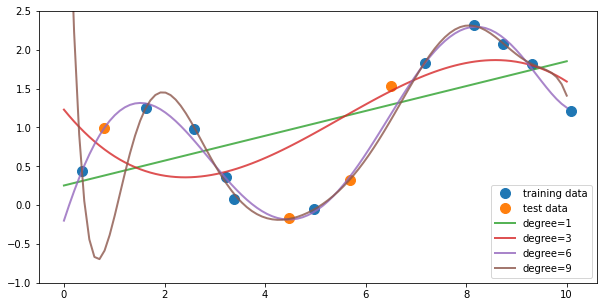

In [72]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    %matplotlib inline
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [92]:
from sklearn.metrics import r2_score
# degrees
degrees = [x for x in range(10)]
r2_train  = np.ones(10)
r2_test = np.ones(10)

In [93]:
# doing in a loop
for i in range(10):
    poly = PolynomialFeatures(degree=degrees[i])
    X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly = poly.transform(X_test.reshape(-1,1))

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    prediction_train = model.predict(X_train_poly)
    prediction_test = model.predict(X_test_poly)

    r2_train[i] = r2_score(y_train, prediction_train)
    r2_test[i] = r2_score(y_test, prediction_test)

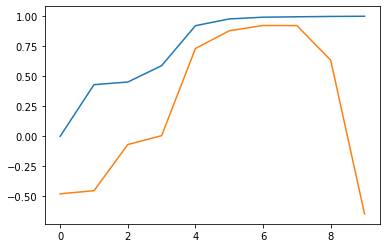

In [104]:
plt.plot( degrees, r2_train);
plt.plot( degrees, r2_test);

In [109]:
# the final function
def answer_two():

    from sklearn.metrics import r2_score
    # degrees
    #degrees = [x for x in range(10)]
    # initializing np arrays for storing r2 values
    r2_train  = np.ones(10)
    r2_test = np.ones(10)

    # tests in a loop from degree in the range of 0, 10
    for i in range(10):
        # Transforming features to polynomial
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
        X_test_poly = poly.transform(X_test.reshape(-1,1))
        # Defining and fitting the model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        # Making predictions
        prediction_train = model.predict(X_train_poly)
        prediction_test = model.predict(X_test_poly)
        # Evaluating test and training sets
        r2_train[i] = r2_score(y_train, prediction_train)
        r2_test[i] = r2_score(y_test, prediction_test)
        
    return (r2_train, r2_test)


### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [110]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics.regression import r2_score

/home/joaolopes/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [115]:
# Transforming features to polynomial
i = 12 # degree
poly = PolynomialFeatures(degree=i)
X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
X_test_poly = poly.transform(X_test.reshape(-1,1))

# Defining and fitting the models
model_Lin = LinearRegression()
model_Lin.fit(X_train_poly, y_train)

model_Lasso = Lasso(alpha=0.01, max_iter=10000)
model_Lasso.fit(X_train_poly, y_train)
# Making predictions
prediction_Lin = model_Lin.predict(X_test_poly)
prediction_Lasso = model_Lasso.predict(X_test_poly)
# Evaluating test and training sets
r2_Lin = r2_score(y_test, prediction_Lin)
r2_Lasso = r2_score(y_test, prediction_Lasso)
(r2_Lin, r2_Lasso)

/home/joaolopes/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3556421695889839, tolerance: 0.00068949825403828
  model = cd_fast.enet_coordinate_descent(


(-4.311980555741178, 0.8406625614750356)